# Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.data_processing import describe_dataframe, plot_missing_values, plot_binary_target_with_stats, show_feature_distributions, plot_survival_rate_categorical

# Load Data

In [2]:
train_data = pd.read_csv("../data/raw/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Create copies
titanic_train = train_data.copy()
titanic_test = test_data.copy()

# Data Exploration

### Missing Values and Data Types

In [5]:
describe_dataframe(titanic_train)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,891,1,int64,Numerical
Survived,0,0.000000,549,0.616162,2,0,int64,Categorical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,891,"Abbing, Mr. Anthony",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,177,0.198653,0,0.000000,88,24.0,float64,Numerical
SibSp,0,0.000000,608,0.682379,7,0,int64,Categorical
Parch,0,0.000000,678,0.760943,7,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,681,1601,object,Categorical
Fare,0,0.000000,15,0.016835,248,8.05,float64,Numerical


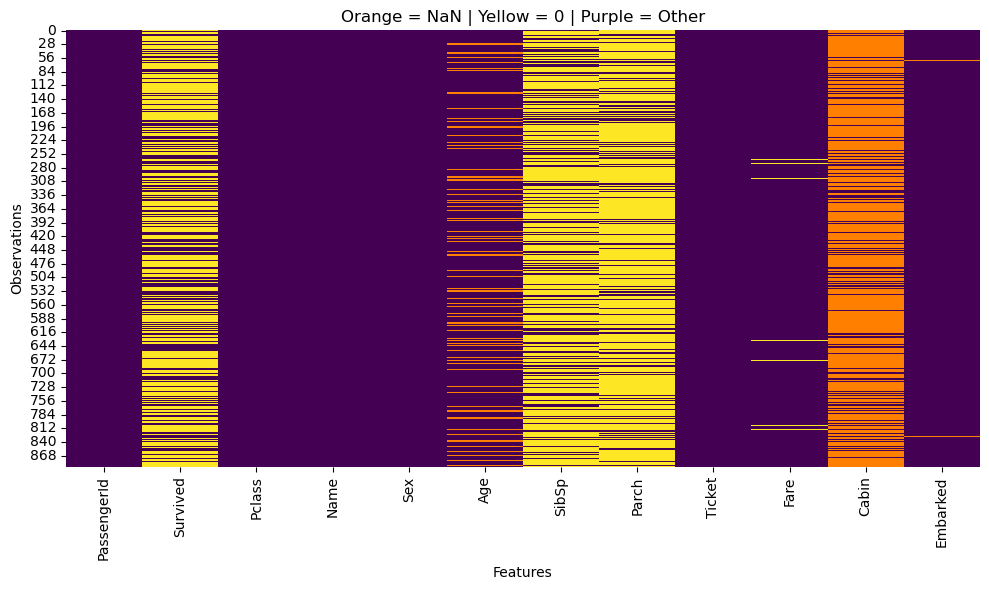

In [6]:
plot_missing_values(titanic_train, show_zeros=True)

In [7]:
describe_dataframe(titanic_test)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,418,892,int64,Numerical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,418,"Abbott, Master. Eugene Joseph",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,86,0.205742,0,0.000000,79,21.0,float64,Numerical
SibSp,0,0.000000,283,0.677033,7,0,int64,Categorical
Parch,0,0.000000,324,0.775120,8,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,363,PC 17608,object,Categorical
Fare,1,0.002392,2,0.004785,169,7.75,float64,Numerical
Cabin,327,0.782297,0,0.000000,76,B57 B59 B63 B66,object,Categorical


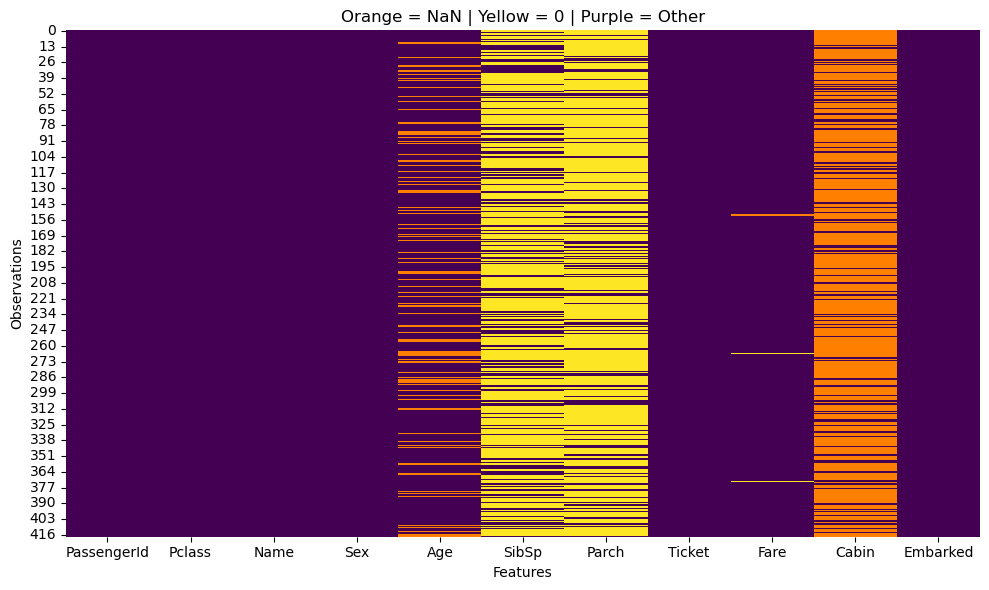

In [8]:
plot_missing_values(titanic_test, show_zeros=True)

### Target Distribution

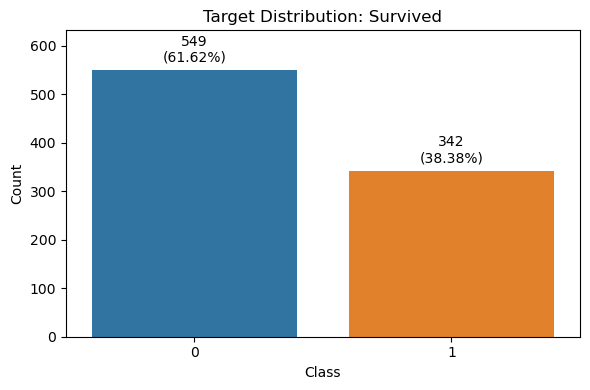

In [9]:
plot_binary_target_with_stats(titanic_train["Survived"], target_col="Survived")


### Feature Distributions

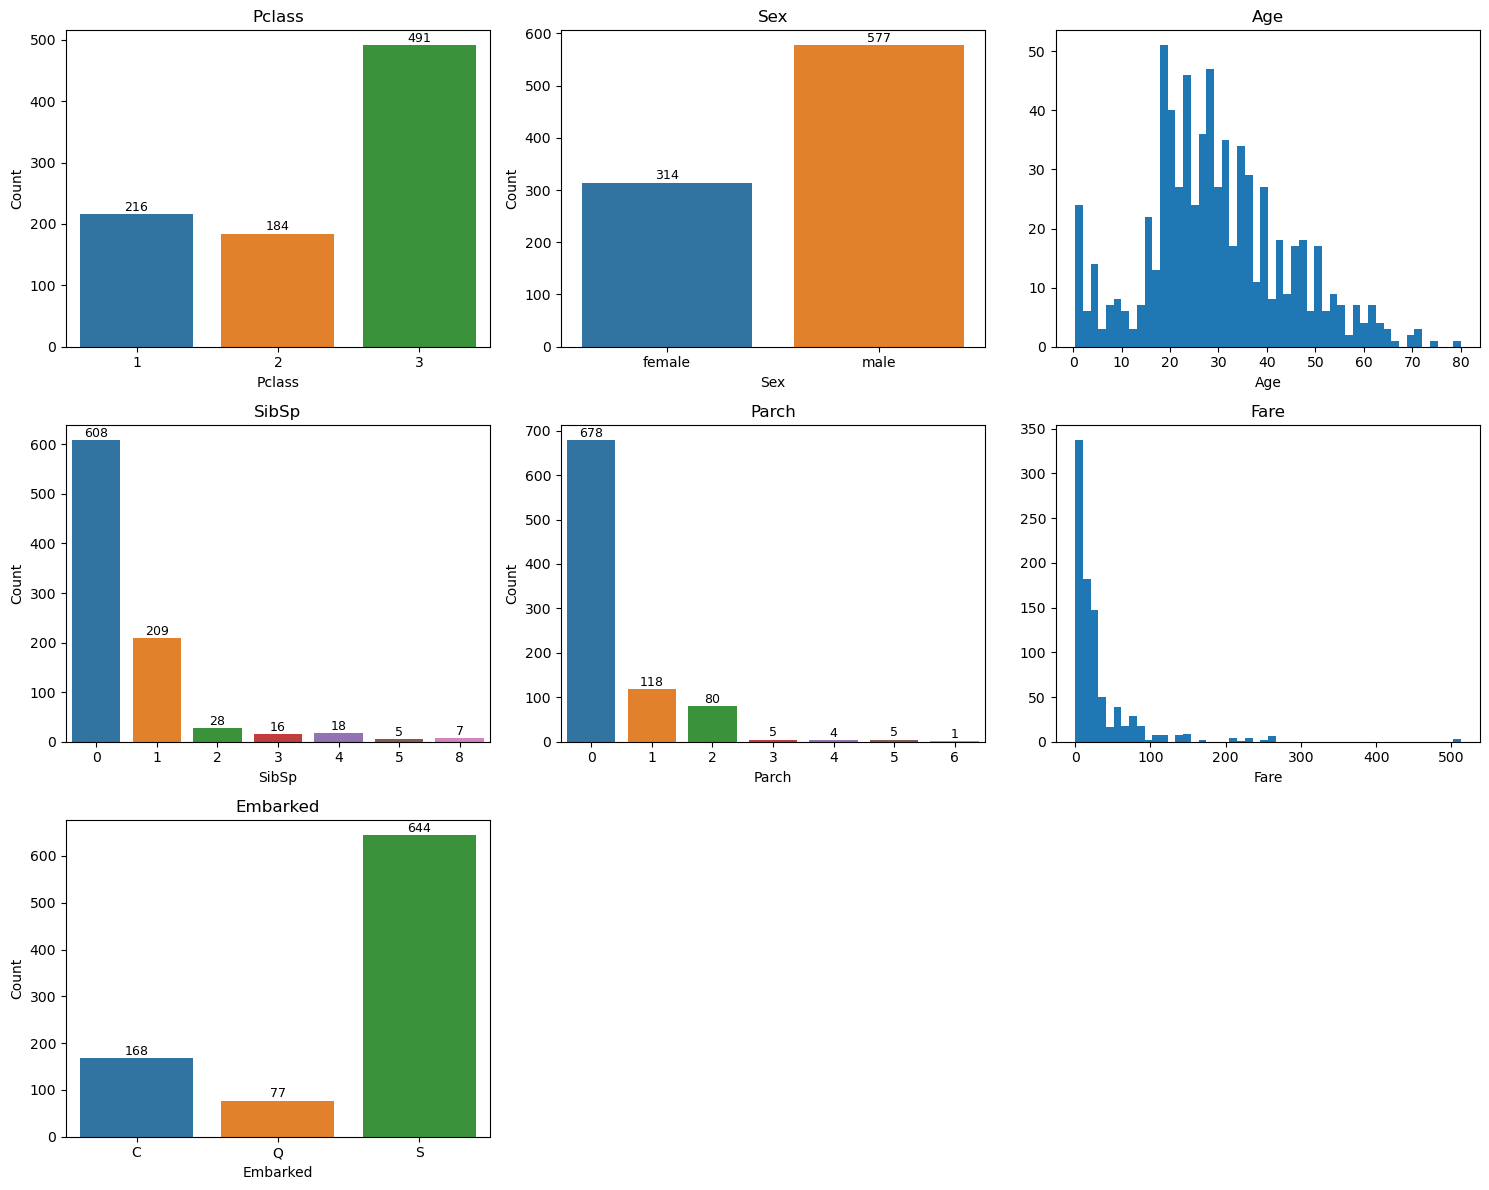

In [10]:
show_feature_distributions(
    titanic_train,
    titanic_train.columns,
    n_cols=3,
    cat_max_unique=10,
    exclude_cols=["PassengerId", "Survived"]
)

### Survival Rate per Feature

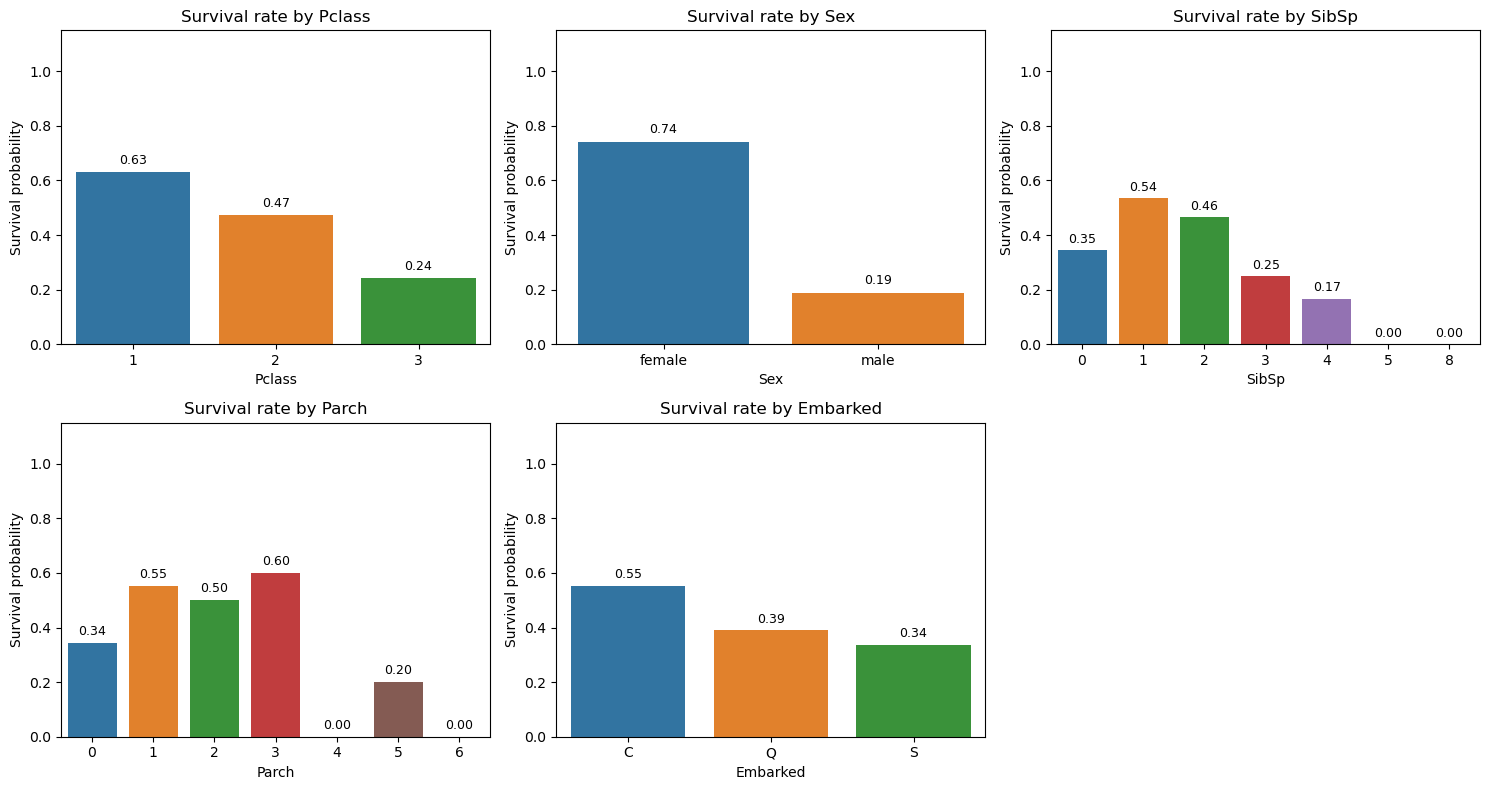

In [11]:
plot_survival_rate_categorical(
    titanic_train,
    titanic_train["Survived"],
    exclude_cols=["Survived", "PassengerId", "Name", "Ticket", "Cabin"]
)

### PassengerID

### Pclass

### Name

In [12]:
# Extract Title

### Sex

### Age

<Axes: xlabel='Age', ylabel='Count'>

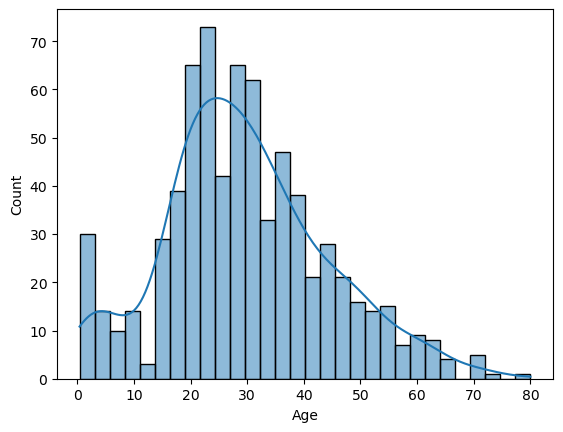

In [13]:
sns.histplot(titanic_train['Age'], kde=True, bins=30)


In [56]:
def detect_outliers(df, col, group_col=None, show=False):
    """
    Detect outliers in a numerical column using IQR.
    If group_col is provided, detect outliers within each group.
    
    Returns a DataFrame of outliers.
    """
    if group_col:
        outliers_list = []
        for group_val, group_df in df.groupby(group_col):
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR

            group_outliers = group_df[(group_df[col] < lower_bound) | (group_df[col] > upper_bound)]
            if show:
                print(f"\n{len(group_outliers)} outliers in {col} for {group_col} = {group_val}:")
                print(group_outliers[[col, group_col]])
            outliers_list.append(group_outliers)
        return pd.concat(outliers_list)
    else:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if show:
            print(f"{len(outliers)} outliers in {col}:")
            print(outliers[[col]])
        return outliers


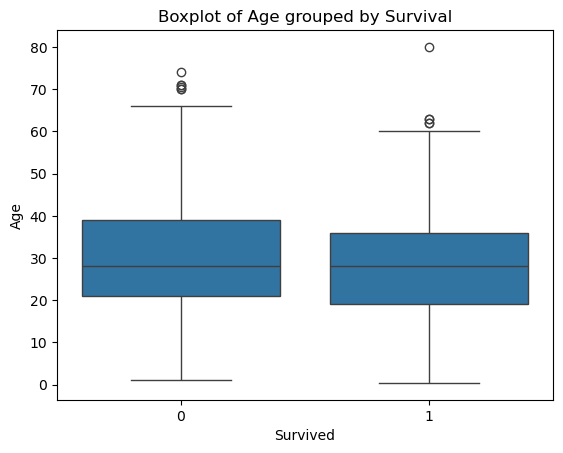

Median Age by Survival:
Survived
0    28.0
1    28.0
Name: Age, dtype: float64

6 outliers in Age for Survived = 0:
      Age  Survived
96   71.0         0
116  70.5         0
493  71.0         0
672  70.0         0
745  70.0         0
851  74.0         0

5 outliers in Age for Survived = 1:
      Age  Survived
275  63.0         1
483  63.0         1
570  62.0         1
630  80.0         1
829  62.0         1


In [57]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Age', data=titanic_train)
plt.title("Boxplot of Age grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Age by Survival:")
print(titanic_train.groupby("Survived")["Age"].median())

# Detect Outliers per Group
outliers = detect_outliers(titanic_train, col="Age", group_col="Survived", show=True)

### SibSp

### Parch

In [15]:
# Compute FamSize and Type

### Ticket

In [16]:
titanic_train.Ticket.value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [17]:
len(titanic_test)

418

In [18]:
common = titanic_train.Ticket[titanic_train.Ticket.isin(titanic_test.Ticket)]
common


1        PC 17599
6           17463
7          349909
10        PP 9549
16         382652
          ...    
860        350026
863      CA. 2343
879         11767
885        382652
888    W./C. 6607
Name: Ticket, Length: 207, dtype: object

In [19]:
# Count how many times each ticket appears in the training set
ticket_counts = titanic_train["Ticket"].value_counts()

def ticket_feature(ticket):
    if ticket_counts.get(ticket, 0) > 2:
        return ticket
    else:
        return "OTHER"

titanic_train["TicketFeature"] = titanic_train["Ticket"].apply(ticket_feature)
titanic_test["TicketFeature"] = titanic_test["Ticket"].apply(ticket_feature)
titanic_train["TicketFeature"].value_counts()

TicketFeature
OTHER            735
347082             7
1601               7
CA. 2343           7
3101295            6
347088             6
CA 2144            6
382652             5
S.O.C. 14879       5
PC 17757           4
113760             4
347077             4
19950              4
349909             4
W./C. 6608         4
4133               4
LINE               4
113781             4
2666               4
17421              4
347742             3
SC/Paris 2123      3
371110             3
C.A. 34651         3
PC 17572           3
110152             3
C.A. 31921         3
35273              3
363291             3
230080             3
PC 17760           3
PC 17755           3
110413             3
13502              3
239853             3
PC 17582           3
F.C.C. 13529       3
29106              3
345773             3
248727             3
24160              3
Name: count, dtype: int64

In [20]:
import pandas as pd

# Example: train DataFrame
# train["Ticket"], train["Sex"] exist

# Group by Ticket and Sex
grouped = titanic_train.groupby(["Ticket", "Sex"])

# Option 1: just get counts of passengers in each group
print(grouped.size().reset_index(name="Count"))

# Option 2: get summary stats for a column (e.g., Age or Survived)
print(grouped["Survived"].mean().reset_index(name="SurvivalRate").to_string())


          Ticket     Sex  Count
0         110152  female      3
1         110413  female      2
2         110413    male      1
3         110465    male      2
4         110564    male      1
..           ...     ...    ...
761   W./C. 6609  female      1
762  W.E.P. 5734    male      1
763    W/C 14208    male      1
764    WE/P 5735  female      1
765    WE/P 5735    male      1

[766 rows x 3 columns]
                 Ticket     Sex  SurvivalRate
0                110152  female      1.000000
1                110413  female      1.000000
2                110413    male      0.000000
3                110465    male      0.000000
4                110564    male      1.000000
5                110813  female      1.000000
6                111240    male      0.000000
7                111320    male      0.000000
8                111361  female      1.000000
9                111369    male      1.000000
10               111426    male      1.000000
11               111427    male      1.0

### Fare

Zero Values

In [21]:
titanic_train[(titanic_train.Fare==0)].iloc[:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketFeature
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,LINE
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,OTHER
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,LINE
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,239853
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,LINE
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,239853
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,239853
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,OTHER
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,LINE
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,OTHER


<Axes: xlabel='Fare', ylabel='Count'>

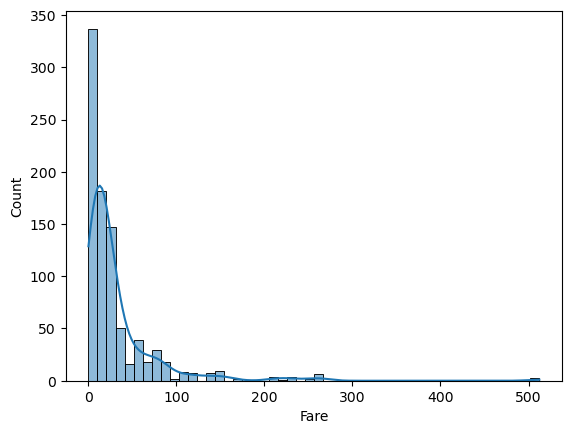

In [ ]:
sns.histplot(titanic_train['Fare'], bins=50, kde=True)


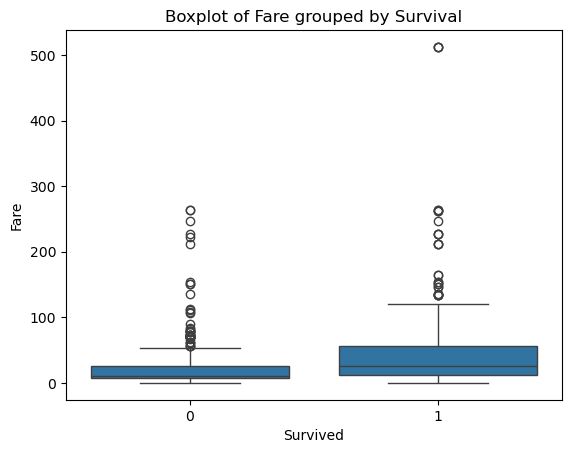

Median Fare by Survival:
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

43 outliers in Fare for Survived = 0:
         Fare  Survived
27   263.0000         0
34    82.1708         0
54    61.9792         0
62    83.4750         0
72    73.5000         0
92    61.1750         0
102   77.2875         0
118  247.5208         0
120   73.5000         0
124   77.2875         0
139   79.2000         0
155   61.3792         0
159   69.5500         0
169   56.4958         0
180   69.5500         0
201   69.5500         0
245   90.0000         0
262   79.6500         0
297  151.5500         0
324   69.5500         0
332  153.4625         0
336   66.6000         0
373  135.6333         0
377  211.5000         0
385   73.5000         0
434   55.9000         0
438  263.0000         0
498  151.5500         0
505  108.9000         0
527  221.7792         0
544  106.4250         0
557  227.5250         0
655   73.5000         0
659  113.2750         0
665   73.5000         0
698  110.8833   

In [60]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_train)
plt.title("Boxplot of Fare grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Fare by Survival:")
print(titanic_train.groupby("Survived")["Fare"].median())

# Detect Outliers per Group
outliers = detect_outliers(titanic_train, col="Fare", group_col="Survived", show=True)

### Cabin

In [14]:
# Extract deck

### Embarked

# Other Ideas

In [ ]:
train_data[(train_data.Fare > 100) & (train_data.Sex == "male")].iloc[:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
332,333,0,1,"Graham, Mr. George Edward",male,38.00,0,1,PC 17582,153.4625,C91,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.00,1,0,PC 17758,108.9000,C65,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [10]:
def plot_survival_rate_numeric(
    X,
    y,
    col,
    bins=10,
    strategy="quantile"  # "uniform" also possible
):
    if strategy == "quantile":
        binned = pd.qcut(X[col], q=bins, duplicates="drop")
    else:
        binned = pd.cut(X[col], bins=bins)

    data = pd.DataFrame({
        col: binned,
        "target": y
    })

    rates = data.groupby(col, observed=True)["target"].mean()
    counts = data.groupby(col, observed=True)["target"].count()

    plt.figure(figsize=(7, 4))
    sns.barplot(x=rates.index.astype(str), y=rates.values)

    for i, (rate, cnt) in enumerate(zip(rates.values, counts.values)):
        plt.text(i, rate + 0.02, f"{rate:.2f}\n(n={cnt})",
                 ha="center", va="bottom", fontsize=9)

    plt.ylim(0, 1.15)
    plt.xticks(rotation=30)
    plt.ylabel("Survival probability")
    plt.title(f"Survival rate by {col} (binned)")
    plt.tight_layout()
    plt.show()


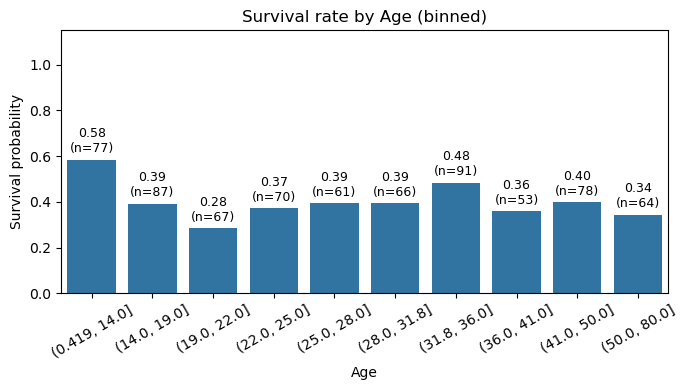

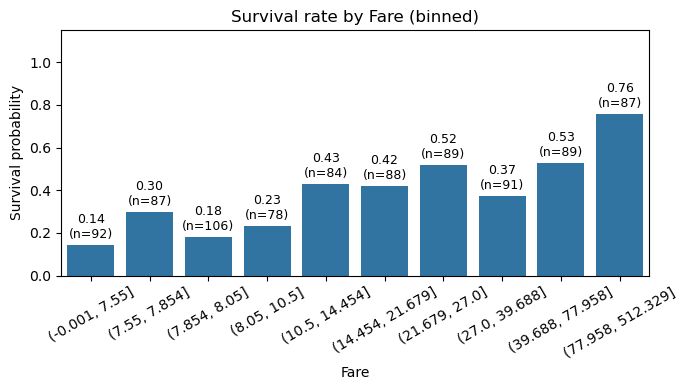

In [11]:
plot_survival_rate_numeric(titanic_train, titanic_train_target, "Age")
plot_survival_rate_numeric(titanic_train, titanic_train_target, "Fare")

In [12]:
def plot_numeric_by_target(X, y, col):
    data = pd.DataFrame({col: X[col], "target": y})

    plt.figure(figsize=(6, 4))
    sns.boxplot(x="target", y=col, data=data)
    sns.stripplot(x="target", y=col, data=data,
                  color="green", alpha=0.3)

    plt.title(f"{col} distribution by survival")
    plt.tight_layout()
    plt.show()


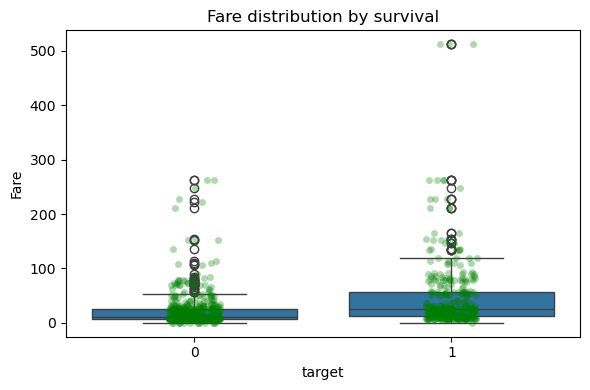

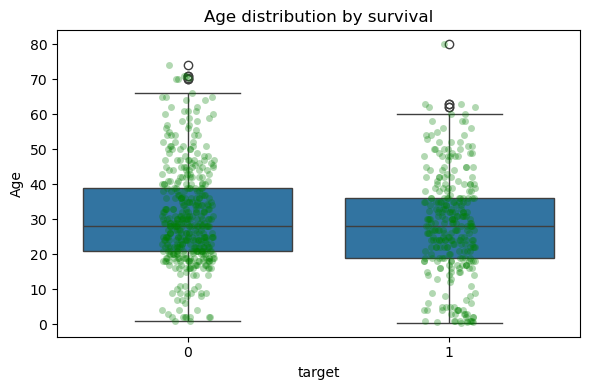

In [13]:
plot_numeric_by_target(titanic_train, titanic_train_target, "Fare")
plot_numeric_by_target(titanic_train, titanic_train_target, "Age")

In [14]:
# group by Sex, Pclass, and Title 
grouped = titanic_train.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.count()#.median()

KeyError: 'Title'

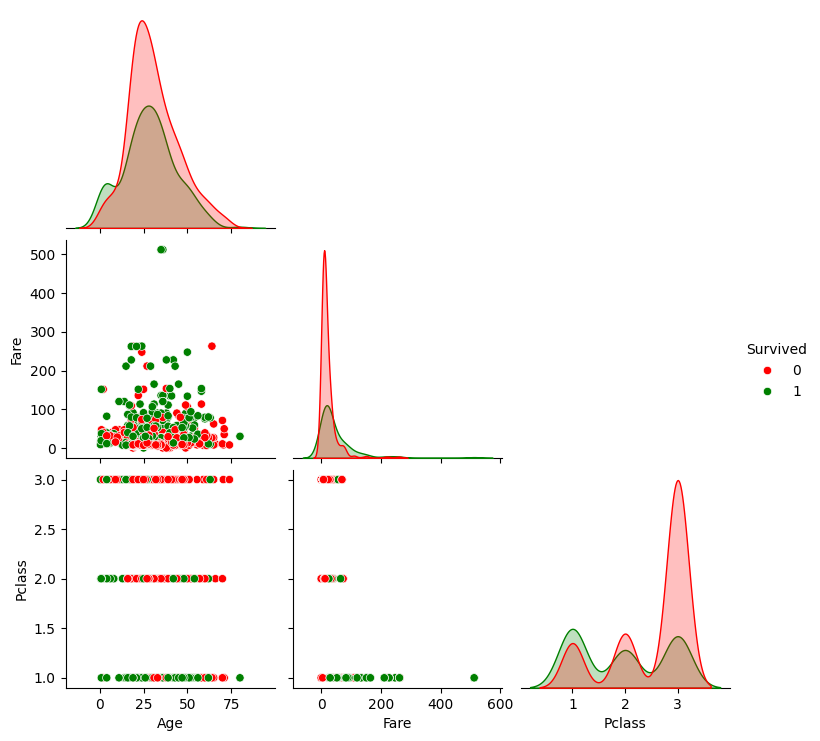

In [ ]:
df_plot = titanic_train.copy()
df_plot["Survived"] = titanic_train_target  # add target as column

numeric_features = ["Age", "Fare", "Pclass"]  # adjust as needed

sns.pairplot(
    df_plot[numeric_features + ["Survived"]],
    hue="Survived",
    palette={0: "red", 1: "green"},
    diag_kind="kde",
    corner=True
)
plt.show()

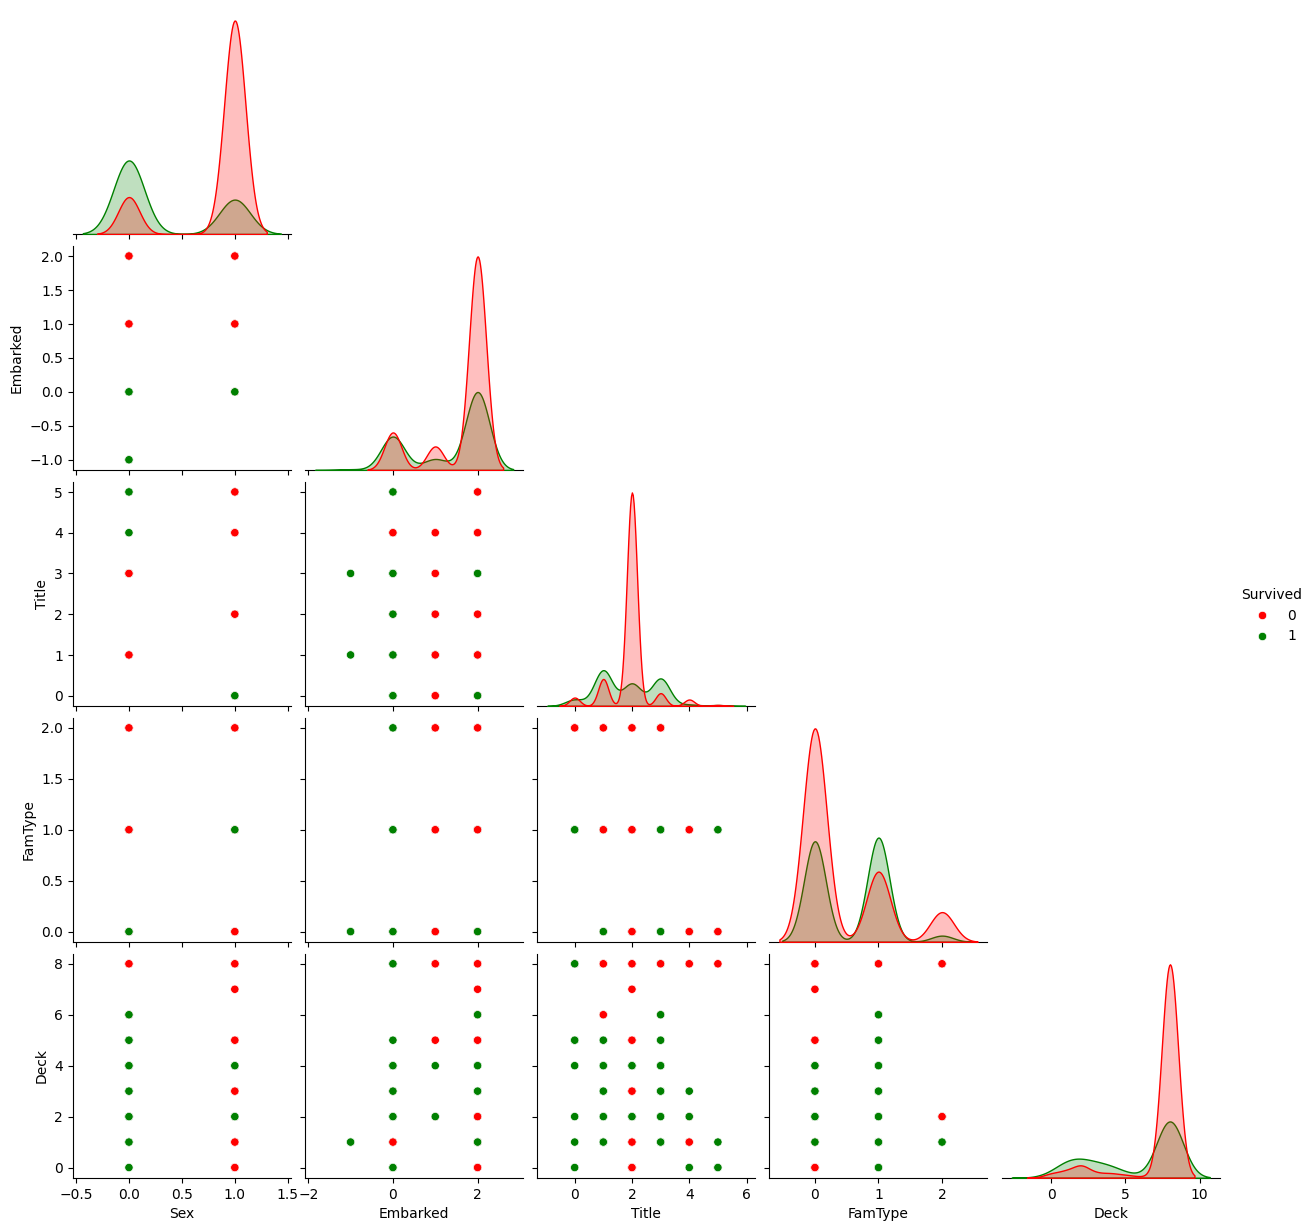

In [ ]:
cat_features = ["Sex", "Embarked", "Title", "FamType", "Deck"]

# Encode categories numerically
df_plot_encoded = df_plot.copy()
for col in cat_features:
    df_plot_encoded[col] = df_plot_encoded[col].astype("category").cat.codes

sns.pairplot(
    df_plot_encoded[cat_features + ["Survived"]],
    hue="Survived",
    palette={0: "red", 1: "green"},
    corner=True
)
plt.show()


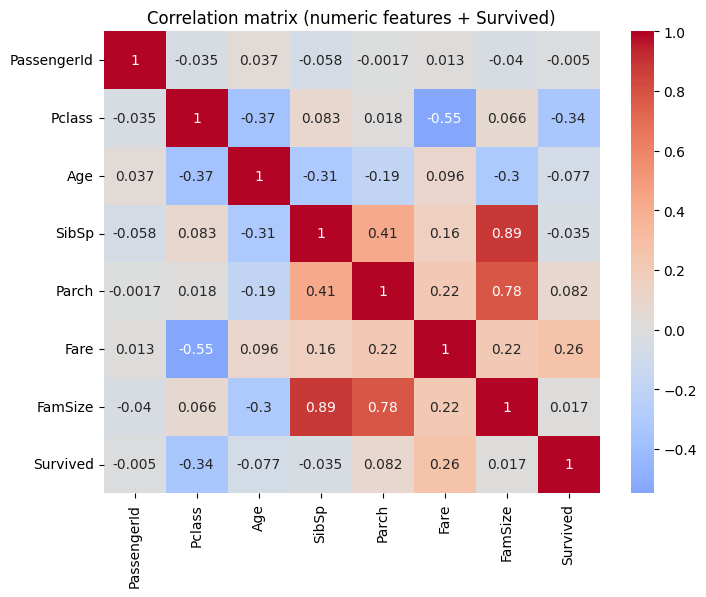

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features + target
df_corr = titanic_train.copy()
df_corr["Survived"] = titanic_train_target

# Select numeric columns
numeric_cols = df_corr.select_dtypes(include=["int64","float64"]).columns

# Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix (numeric features + Survived)")
plt.show()


### Correlation

In [ ]:
# If your target is a Series or single-column DataFrame
if isinstance(titanic_train_target, pd.DataFrame):
    titanic_train_target = titanic_train_target.iloc[:, 0]

# Align indices and join
data = titanic_train.join(titanic_train_target.rename("Survived"), how="inner")

# Compute numeric correlations
corr_matrix = data.corr(numeric_only=True)

# Sort features by correlation with target
target_corr = corr_matrix["Survived"].sort_values(ascending=False)
target_corr

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamSize        0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

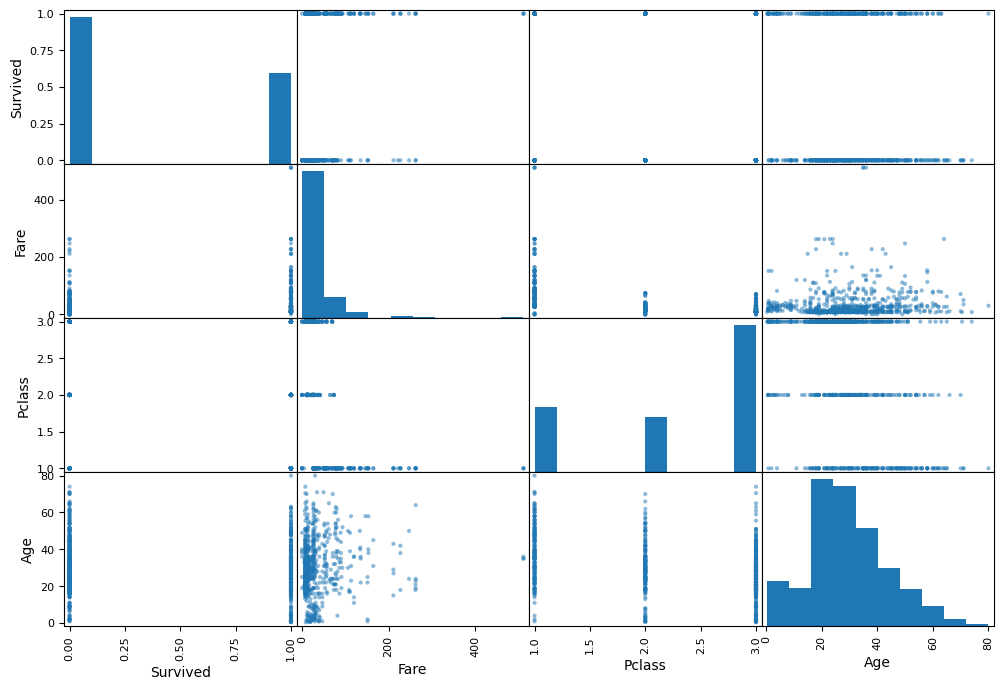

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Pclass", "Age"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
plt.show()